In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

東京大学数理・データサイエンスコンソーシアム 社会人向け講座 2019年秋

# 解析・線形代数入門 〜データサイエンスのための〜

# 1-3 偏微分

## 二変数関数の微分

* 二変数関数: $z=f(x,y)$
* 二変数関数の場合、傾きを考える方向がいろいろある
* $x$と$y$を固定した断面図を考え、それぞれの微分を考えてみる
* 例: $z = f(x,y) = x^2 + 2xy + y^3$

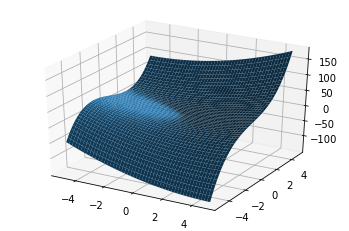

In [2]:
def f(x, y):
    return x**2 + 2 * x * y + y**3;
x, y = numpy.mgrid[-5:5:0.2, -5:5:0.2];
fig = pyplot.figure();
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(x, y, f(x, y));

* $y=1$に沿った断面<br>
  $z = f(x,1) = x^2 + 2x+1$
* $y=1$に沿って$x$を動かした時、$x=2$における傾き<br>
  $\displaystyle \lim_{h \rightarrow 0} \frac{f(x+h,1)-f(x,1)}{h}|_{x=2} = 2x+2|_{x=2}=6$

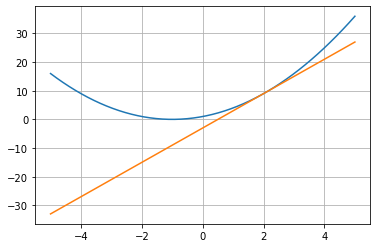

In [3]:
x = numpy.linspace(-5,5);
pyplot.plot(x, f(x,1));
pyplot.plot(x, 6 * (x - 2) + 9);
pyplot.grid(which="major")

* $x=2$に沿った断面<br>
  $z=f(2,y)=y^3+4y+4$
* $x=2$に沿って$y$を動かした時、$y=1$における傾き<br>
  $\displaystyle \lim_{h \rightarrow 0} \frac{f(2,y+h)-f(2,y)}{h}|_{y=1} = 3y^2+4|_{y=1}=7$

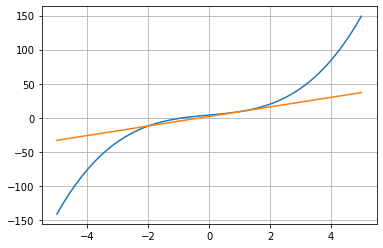

In [4]:
y = numpy.linspace(-5,5);
pyplot.plot(y, f(2,y));
pyplot.plot(y, 7 * (y - 1) + 9);
pyplot.grid(which="major")

### 偏微分
* $y=1$に沿った断面図$z= x^2 + 2x+1$の導関数$2x+2$は、$x^2 + 2xy + y^3$の$y$を定数だと思って微分して$y=1$を代入したものに等しい
* $z=x^2 + 2xy + y^3$ → $y$を定数だと思って微分→ $z'=2x+2y$ → $y=1$を代入 → $z'=2x+2$
* 多変数関数を他の変数を定数だと思って、ある変数で微分することを「偏微分」という
* $z=f(x,y)$の$x$に関する偏微分を$\displaystyle \frac{\partial f}{\partial x}$と書く($\partial$ (デルタ)はギリシャ文字の$d$)
* 例1: $z=f(x,y) = x^2 + 2xy + y^3$
  * $\displaystyle \frac{\partial f}{\partial x}(x,y) = 2x + 2y$
  * $\displaystyle \frac{\partial f}{\partial y}(x,y) = 3y^2 + 2x$
* 例2: $z=f(x,y) = e^{xy}$
  * $\displaystyle \frac{\partial f}{\partial x}(x,y) = y e^{xy}$
  * $\displaystyle \frac{\partial f}{\partial y}(x,y) = x e^{xy}$

### 合成関数の微分
* 一変数の場合<br>
  $F(x) = f(g(x))$ → $\displaystyle \frac{dF}{dx} = \frac{df}{dg} \frac{dg}{dx}$
* 一変数関数$f(t)$の変数$t$が、$x$と$y$の二変数の関数$t=t(x,y)$のとき、合成関数$F(x,y)=f(t(x,y))$は二変数関数となる。このとき<br>
  $\displaystyle \frac{\partial F}{\partial x} = \frac{df}{dt} \frac{\partial t}{\partial x}$<br>
  $\displaystyle \frac{\partial F}{\partial y} = \frac{df}{dt} \frac{\partial t}{\partial y}$
  * 証明<br>
    $\displaystyle \frac{\partial F}{\partial x} = \lim_{h \rightarrow 0} \frac{f(t(x+h,y))-f(t(x,y))}{h} = \lim_{h \rightarrow 0} \frac{f(t(x+h,y))-f(t(x,y))}{t(x+h,y)-t(x,y)} \frac{t(x+h,y) - t(x,y)}{h} = \frac{df}{dt} \frac{\partial t}{\partial x}$<br>
    ($y$についても同様)
  * 例: $f(t) = e^t$, $t(x,y) = xy$ → $F(x,y) = e^{xy}$ <br>
    $\displaystyle \frac{\partial F}{\partial x} = \frac{df}{dt} \frac{\partial t}{\partial x} = e^t y = y e^{xy}$
* 二変数関数$f(x,y)$が与えられたとき、$x$が$t$の関数$x(t)$、$y$も$t$の関数$y(t)$であるとして、$F(t)=f(x(t), y(t))$という独立変数を$t$とする一変数関数を定義することができる。この関数$F(t)$の$t$に関する微分を考えると<br>
  $\displaystyle \frac{dF}{dt} = \frac{\partial f}{\partial x} \frac{dx}{dt} + \frac{\partial f}{\partial y} \frac{dy}{dt}$
  * 証明<br>
    $\displaystyle \frac{dF}{dt} = \lim_{h \rightarrow 0} \frac{f(x(t+h),y(t+h))-f(x(t),y(t))}{h}$<br>
    ここで$\Delta x = x(t+h) - x(t)$、$\Delta y = y(t+h) - y(t)$とおくと<br>
    $\displaystyle \frac{f(x(t+h),y(t+h))-f(x(t),y(t))}{h} = \frac{(f(x+\Delta x,y+\Delta y)-f(x,y+\Delta y))+(f(x,y+\Delta y)-f(x,y)}{h} = \frac{f(x+\Delta x,y+\Delta y)-f(x,y+\Delta y)}{\Delta x} \frac{\Delta x}{h} + \frac{f(x,y+\Delta y)-f(x,y)}{\Delta y} \frac{\Delta y}{h} \rightarrow \frac{\partial f}{\partial x}(x,y+\Delta y) \frac{dx}{dt} + \frac{\partial f}{\partial y}(x,y) \frac{dy}{dt} \rightarrow \frac{\partial f}{\partial x} \frac{dx}{dt} + \frac{\partial f}{\partial y} \frac{dy}{dt}$
  * 例: $f(x,y) = x^2+xy+y^2$、$x=t^3+1$、$y=t^2+1$<br>
     $\displaystyle \frac{\partial f}{\partial x}=2x+y$、$\displaystyle \frac{\partial f}{\partial y} = x+2y$、$\displaystyle \frac{dx}{dt}=3t^2$、$\displaystyle \frac{dy}{dt}=2t$より<br>
     
     $\displaystyle \frac{dF}{dt} = (2x+y) (3t^2) + (x+2y) (2t) = (2t^3+t^2+3) (3t^2) + (t^3+2t^2+3) (2t) = 6t^5+5t^4+4t^3+9t^2+6t$
  * 微分の「連鎖公式」と呼ぶ
  * 深層学習において「バックプロパゲーション」、あるいは「自動微分」と呼ばれているものも、この連鎖公式を使った合成関数の微分のこと

## 関数の極大・極小
* 一変数関数の場合
  * $f'(x) > 0$ ならば $x$ の近辺で増加
  * $f'(x) < 0$ ならば $x$ の近辺で減少
  * $x=x_0$で$f(x)$が極値をとる条件 → $f'(x_0) = 0$
    * 極大値: $f''(x_0) < 0$
    * 極小値: $f''(x_0) > 0$
  * 逆に、$f'(x_0) = 0$であっても、極値をとるとは限らない
    * 例: $y=x^3$
  * 極大値(極小値)であったとしても、最大値(最小値)とは限らない
* 二変数関数の場合
  * 点$(x_0,y_0)$で$f(x,y)$が極大 ⇔ $(x_0,y_0)$のまわりの点$(x,y)$で、$f(x,y) < f(x_0,y_0)$
  * 点$(x_0,y_0)$で$f(x,y)$が極小 ⇔ $(x_0,y_0)$のまわりの点$(x,y)$で、$f(x,y) > f(x_0,y_0)$
  * 極値をとるための条件<br>
    $\displaystyle \frac{\partial f}{\partial x} (x_0,y_0) = \frac{\partial f}{\partial y} (x_0,y_0) = 0$
  * 注意: 上の条件を満たしていても極大・極小にならない場合もある
    * $f(x,y)=x^2+y^2$ → $x=y=0$で極小
    * $f(x,y)=x^2+y^2$ → $\displaystyle \frac{\partial f}{\partial x} (0,0) = \frac{\partial f}{\partial y} (0,0) = 0$だが極大でも極小でもない → 鞍点(あんてん)


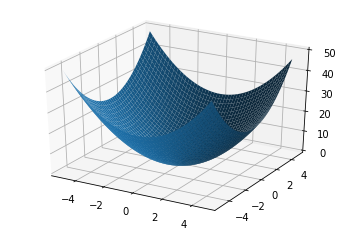

In [5]:
x, y = numpy.mgrid[-5:5:0.2, -5:5:0.2];
fig = pyplot.figure();
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(x, y, x**2+y**2);

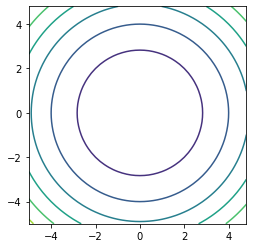

In [6]:
pyplot.contour(x, y, x**2+y**2);
pyplot.gca().set_aspect('equal');

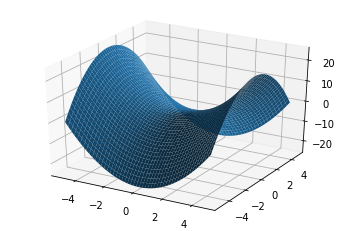

In [7]:
x, y = numpy.mgrid[-5:5:0.2, -5:5:0.2];
fig = pyplot.figure();
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(x, y, x**2-y**2);

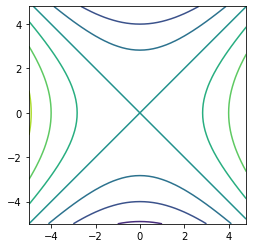

In [8]:
pyplot.contour(x, y, x**2-y**2);
pyplot.gca().set_aspect('equal');

### 勾配降下法
* 関数の極小値を求める方法
* 一変数の場合
  * $f'(x) > 0$の場合には$x$を減らせば、$f'(x) < 0$の場合には$x$を増やせば、$f(x)$の値は減少する
  * $x \leftarrow x - \epsilon f'(x)$ ($\epsilon$は小さな定数)
  * 繰り返していくと、極小値に収束する
  * 最小値とは限らない
* 二変数の場合も$x$軸方向と$y$軸方向にそれぞれ偏微分の正負に従って進んで行けばよい
  * $x \leftarrow x - \epsilon f_x(x,y)$<br>
  * $y \leftarrow y - \epsilon f_y(x,y)$
* $n$変数の場合も同様
* 機械学習において最も基本的なアルゴリズム

## 接平面
* 一変数関数$y=f(x)$の$x=x_0$における接線の方程式<br>
  $\displaystyle y = f(x_0) + f'(x_0) (x-x_0)$
  * テイラー展開の一次までの近似となっている
* 二変数の場合: $z=f(x,y)$は曲面を描く
* $(x,y)=(x_0,y_0)$における接平面の方程式<br>
  $\displaystyle z = f(x_0,y_0) + f_x(x_0,y_0) (x-x_0) + f_y(x_0,y_0) (y-y_0)$
  * $(x_0,y_0)$における、(一階の)偏微分が一致する
* 例: $z= f(x,y) = x^2+y^2)$の$(x,y)=(1,1)$における接平面<br>
  $f_x(1,1) = 2$、$f_y(1,1)=2$ → $\displaystyle z = 2 + 2 (x-1) + 2 (y-1) = 2x+2y-2$

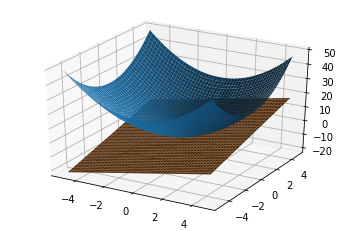

In [9]:
x, y = numpy.mgrid[-5:5:0.2, -5:5:0.2];
fig = pyplot.figure();
ax = fig.add_subplot(111, projection='3d');
ax.plot_surface(x, y, x**2+y**2);
ax.plot_surface(x, y, 2*x+2*y-2);

## 陰関数
* 二変数関数$F(x,y)$に対して$F(x,y)=a$を考えると、$x$-$y$平面上の曲線(標高$a$の等高線)が得られる
* 各$x$の値に対して$y$が決まるので、一変数関数$y=f(x)$が定まり、$F(x,y(x))=a$が成り立つ
* $F(x,y)=a$を$y=f(x)$の「陰関数表示」と呼ぶ
* 例: $F(x,y)=x^2+y^2=r^2 (=a)$<br>
  $y$について解くと、$y=\pm\sqrt{r^2-x^2}=f(x)$<br>
  このとき、$F(x,f(x))=x^2+(f(x))^2 = r^2$が成り立つ

### 陰関数の微分
* $F(x,f(x))=a$の両辺を$x$で微分
* 合成関数の微分の公式(連鎖公式)を使うと<br>
  $\displaystyle \frac{\partial F}{\partial x} + \frac{\partial F}{\partial y}\frac{df}{dx} = 0$<br>
  より<br>
  $\displaystyle \frac{df}{dx} = - \frac{F_x}{F_y}$
* 例: $F(x,y)=x^2+y^2=r^2$の$y \ge 0$の領域を考える<br>
  $F_x=2x$、$F_y=2y$より<br>
  $\displaystyle \frac{df}{dx} = - \frac{x}{y} = -\frac{x}{\sqrt{r^2-x^2}}$<br>
  確認<br>
  $\displaystyle (\sqrt{r^2-x^2})' = \frac{1}{2} (r^2-x^2)^{-1/2}(-2x) = -\frac{x}{\sqrt{r^2-x^2}}$

